# 데이터 가져오기

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [85]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 데이터 전처리

In [119]:
X = data.drop(['Outcome'],axis = 1)
X.head()
X = np.asarray(X)
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [135]:
Y = data['Outcome'].values
Y = np.asarray(Y)
np.min(X,axis =0)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
# 데이터 노멀라이즈
X = ((X - np.min(X, axis = 0)) / (np.max(X, axis = 0) - np.min(X, axis = 0)))
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [122]:
# 훈련용,테스트용 데이터 분리
from sklearn.model_selection import train_test_split

train_x,test_x, train_y, test_y = \
    train_test_split(X,Y,test_size = 0.2)

In [123]:
print(train_x.shape, test_x.shape)

(614, 8) (154, 8)


# 신경망 구축

In [124]:
from tensorflow import keras
EPOCHS = 50


In [130]:
model = keras.Sequential([
    keras.layers.Dense(8), #입력층
    keras.layers.Dense(256,activation = "relu"),
    keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [131]:
#  0,1에서는 binary_crossentropy
model.compile(optimizer= "adam", loss = "binary_crossentropy",metrics = ['accuracy'])

In [132]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)

In [133]:
history = model.fit(train_x,train_y, epochs = EPOCHS,
                   validation_data = (test_x, test_y),
                    callbacks = [early_stop])
    

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 1s 1ms/sample - loss: 0.6671 - accuracy: 0.6221 - val_loss: 0.6805 - val_accuracy: 0.6169
Epoch 2/50
614/614 [==============================] - 0s 114us/sample - loss: 0.6446 - accuracy: 0.6612 - val_loss: 0.6813 - val_accuracy: 0.6169
Epoch 3/50
614/614 [==============================] - 0s 111us/sample - loss: 0.6332 - accuracy: 0.6612 - val_loss: 0.6717 - val_accuracy: 0.6104
Epoch 4/50
614/614 [==============================] - 0s 122us/sample - loss: 0.6252 - accuracy: 0.6661 - val_loss: 0.6649 - val_accuracy: 0.6169
Epoch 5/50
614/614 [==============================] - 0s 129us/sample - loss: 0.6216 - accuracy: 0.6596 - val_loss: 0.6540 - val_accuracy: 0.6104
Epoch 6/50
614/614 [==============================] - 0s 114us/sample - loss: 0.6093 - accuracy: 0.6726 - val_loss: 0.6545 - val_accuracy: 0.6169
Epoch 7/50
614/614 [==============================] - 0s 117us/sample - loss: 0.

In [136]:
# 예측값 비교해보기
pred = model.predict(train_x[:5])
pred


array([[0.78787965],
       [0.7909967 ],
       [0.10328174],
       [0.16521606],
       [0.8038505 ]], dtype=float32)

In [137]:
train_y[:5]

array([1, 1, 0, 0, 1])

In [138]:
import matplotlib.pyplot as plt

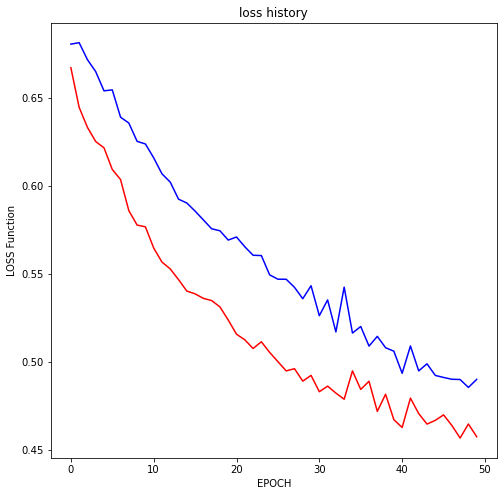

In [139]:
train_history = history.history["loss"]
validate_history = history.history["val_loss"]

fig = plt.figure(figsize = (8,8))
plt.title("loss history")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()

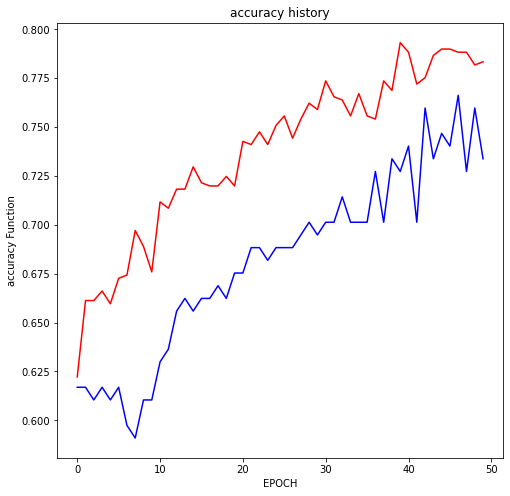

In [140]:
train_history = history.history['accuracy']
validate_history = history.history['val_accuracy']

fig = plt.figure(figsize = (8,8))
plt.title("accuracy history")
plt.xlabel("EPOCH")
plt.ylabel("accuracy Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")

plt.show()

In [141]:
from tensorflow.keras.utils import plot_model

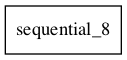

In [142]:
plot_model(model, 'input_and_output_model.png', show_shapes = True)